In [1]:
#importamos las librearías que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from ydata_profiling import ProfileReport
import warnings

In [2]:
#Cargar DataSet
ruta_yelp = "C:\\Users\\licle\\Desktop\\PF\\DATA FRANSCISCO\\yelp_review-001.parquet"

yelp_review = pd.read_parquet(ruta_yelp)

In [3]:
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
yelp_review.shape

(6990280, 9)

In [5]:
#¿Hay datos nulos?
yelp_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [8]:
#¿Se repiten los usuarios?
yelp_review.user_id.value_counts()

user_id
_BcWyKQL16ndpBdggh2kNA    3048
Xw7ZjaGfr0WNVt6s_5KZfA    1840
0Igx-a1wAstiBDerGxXk2A    1747
-G7Zkl1wIWBBmD0KRy_sCw    1682
ET8n-r7glWYqZhuR6GcdNw    1653
                          ... 
wECd-0riShbpLpwlYdIKsw       1
jMCXWGpebX7bo6FMFh081g       1
IW7iNmK1om-3yOvI0XKeTA       1
r9QuC6iydjD-qj6nnRWtMA       1
_XVdmFWSgTN6YlojUxixTA       1
Name: count, Length: 1987929, dtype: int64

In [9]:
#¿Se repiten los comentarios?
yelp_review.review_id.value_counts()

review_id
KU_O5udG6zpxOg-VcAEodg    1
IWm8ubpQ_avhI4Km_nMoaw    1
-hVKNBV5ZB-tN7cmd5yrSQ    1
J3MPHOLzcLKKdvAeJYQOUQ    1
aMYlE1Mc-YNSRMaul9VTEA    1
                         ..
iDRs3OBcFOJw97DxHkjmKQ    1
QsQH0YEcQxAgv0L_j0zLiA    1
1k4b4i7PG0OOH4loCjQQmA    1
f6O1tTmqX1BS0lVclMFArg    1
RwcKOdEuLRHNJe4M9-qpqg    1
Name: count, Length: 6990280, dtype: int64

In [10]:
#¿Se repiten los id de negocios?
yelp_review.business_id.value_counts()

business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
                          ... 
e1sb7nOLepoM_aiK2gFVWA       5
RoozrgdjNpBnXNg3mzJb_Q       5
2krhc20RzgOYGhfLD8hM0g       5
0Jr6K1BXsS9ZmZQtDdx0UA       5
vI4vyi1dfG93oAiSRFDymA       5
Name: count, Length: 150346, dtype: int64

In [7]:
#Un resumen de los datos:
yelp_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [21]:
sumario = yelp_review.describe()
redondear_sumario = sumario.round(2)
print(redondear_sumario)

            stars      useful       funny        cool  \
count  6990280.00  6990280.00  6990280.00  6990280.00   
mean         3.75        1.18        0.33        0.50   
min          1.00       -1.00       -1.00       -1.00   
25%          3.00        0.00        0.00        0.00   
50%          4.00        0.00        0.00        0.00   
75%          5.00        1.00        0.00        0.00   
max          5.00     1182.00      792.00      404.00   
std          1.48        3.25        1.69        2.17   

                                date        year  
count                        6990280  6990280.00  
mean   2017-01-11 11:22:33.441780992     2016.54  
min              2005-02-16 03:23:22     2005.00  
25%    2015-01-25 04:53:50.249999872     2015.00  
50%              2017-06-03 01:26:07     2017.00  
75%    2019-05-23 00:02:46.249999872     2019.00  
max              2022-01-19 19:48:45     2022.00  
std                              NaN        3.08  


In [13]:
# Asegurarse de que la columna 'date' es del tipo datetime
yelp_review['date'] = pd.to_datetime(yelp_review['date'])
# Extraer el año y agregarlo como una nueva columna
yelp_review['year'] = yelp_review['date'].dt.year

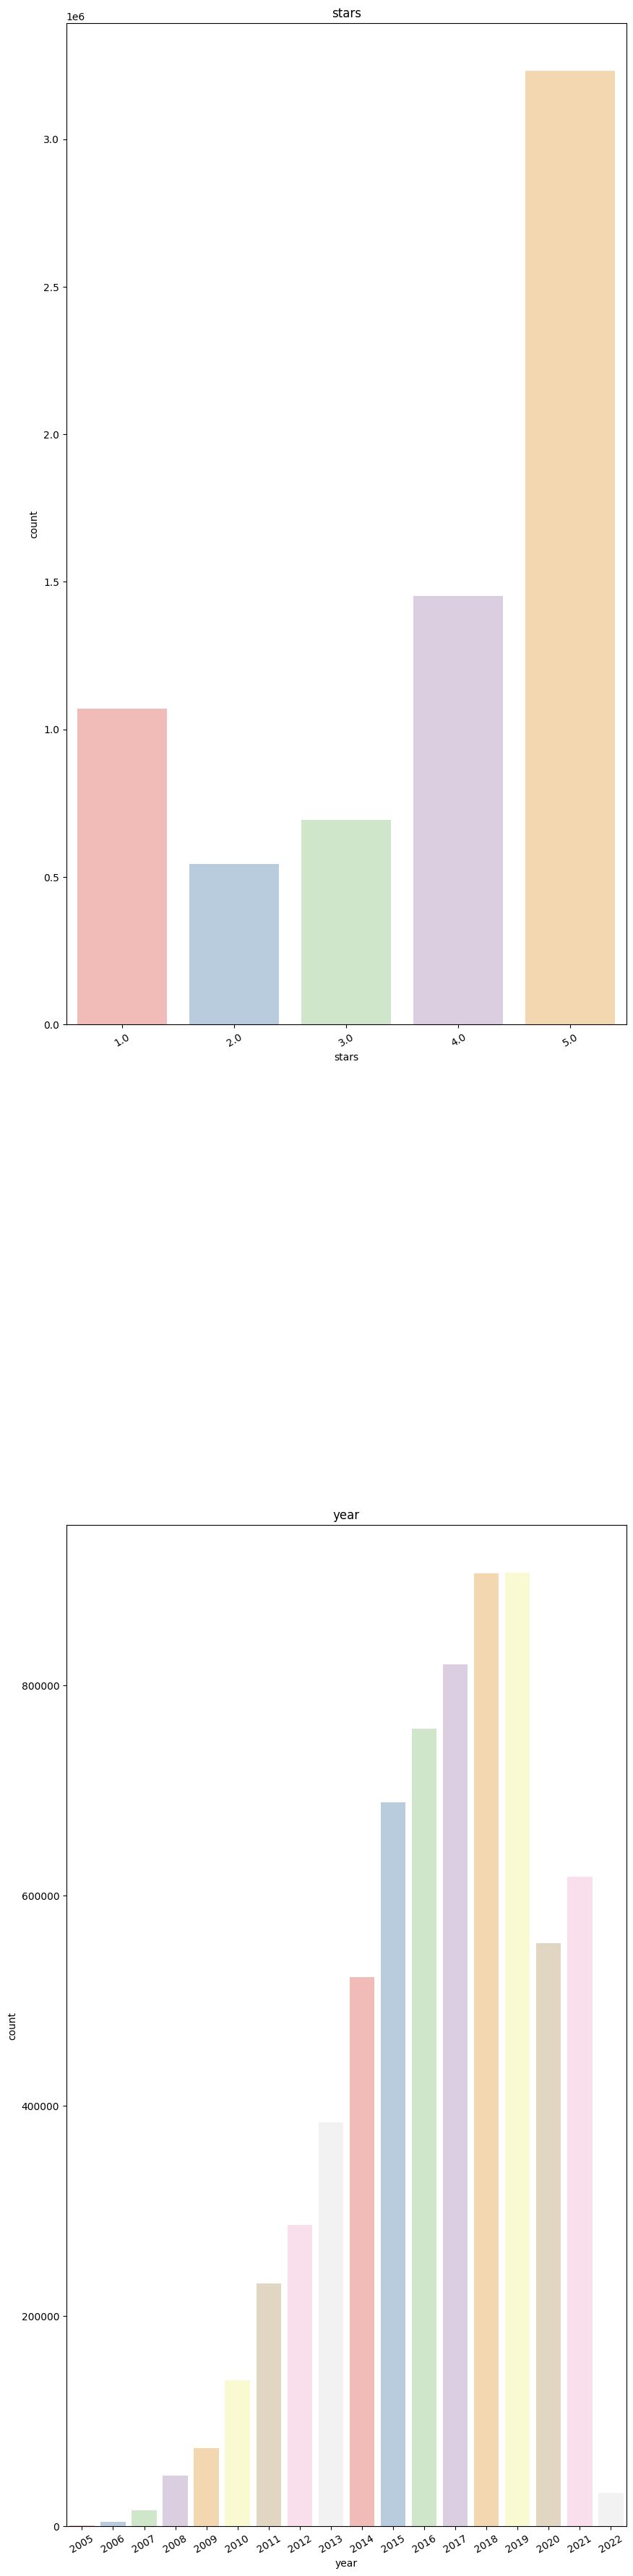

In [15]:
#Graficar subniveles de cada variable categórica
cols_cat = ["stars","year"]

#Filtramos mensajes de advertencias para que nuestro resultado sea más prólijo
warnings.filterwarnings("ignore")

#Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(cols_cat),ncols =1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=yelp_review,ax=ax[i], palette='Pastel1')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

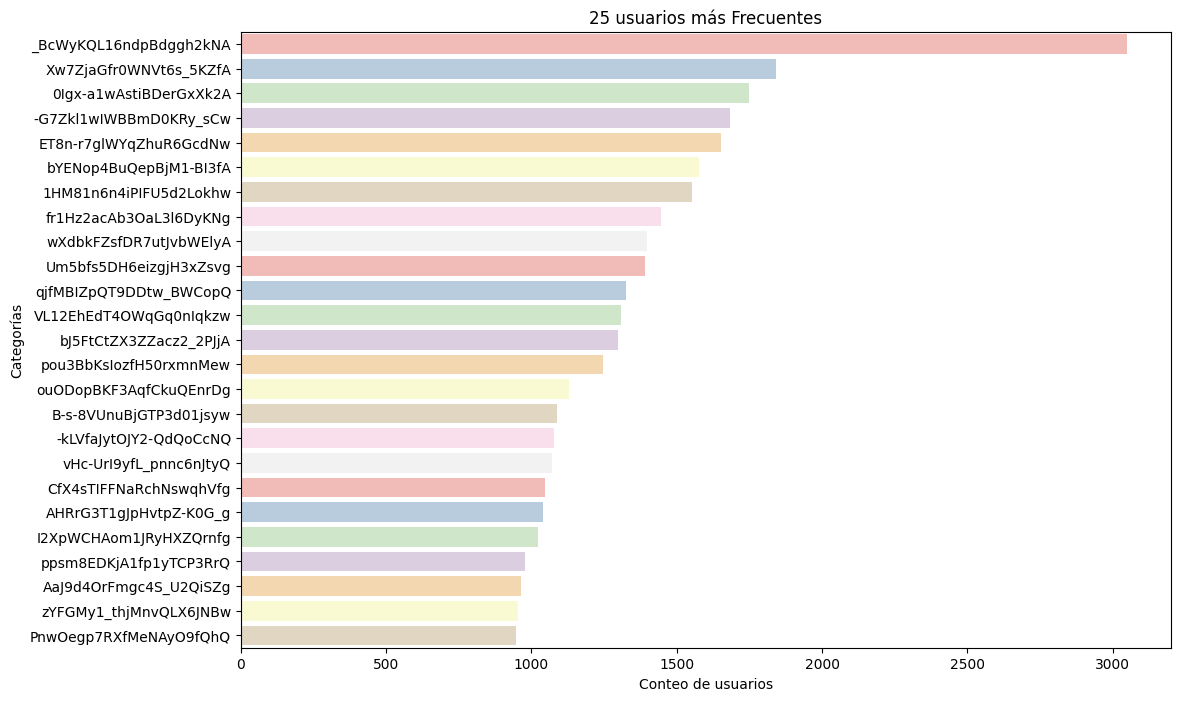

In [17]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las los usuarios repetidos 
categoria_counts = yelp_review['user_id'].value_counts()

# Seleccionar los 25 usuarios más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar las 25 usuarios más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

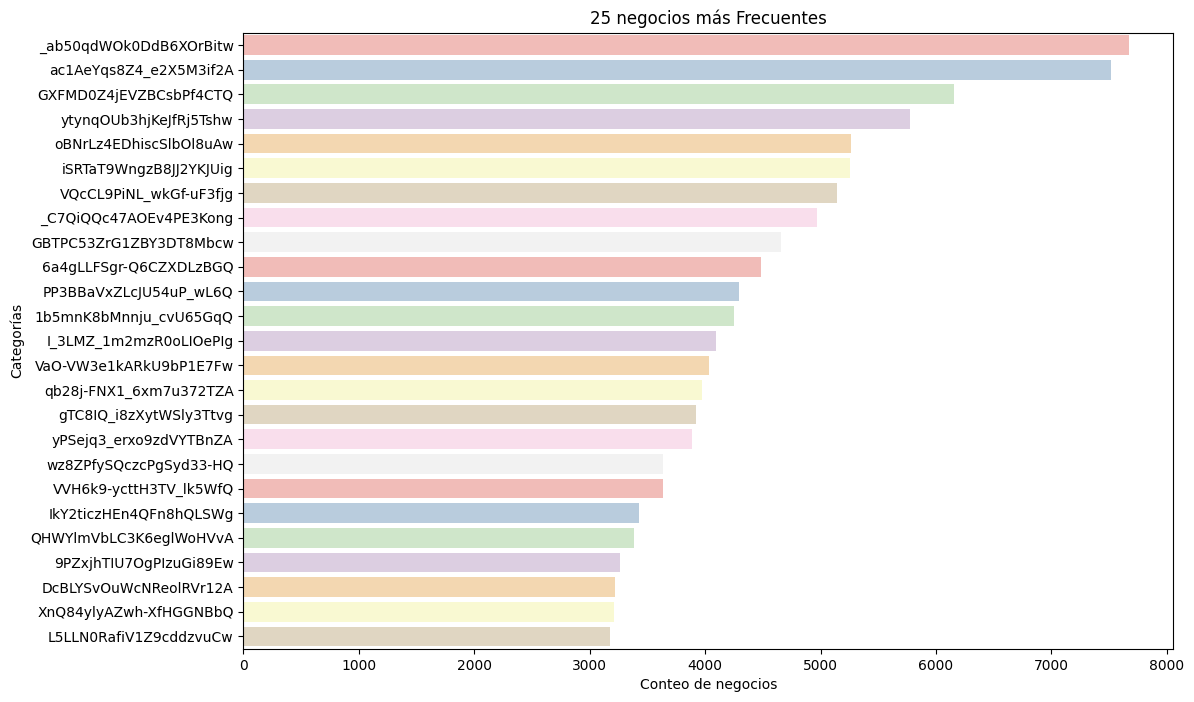

In [18]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las los usuarios repetidos 
categoria_counts = yelp_review['business_id'].value_counts()

# Seleccionar los 25 usuarios más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar las 25 usuarios más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de negocios')
plt.ylabel('Categorías')
plt.title('25 negocios más Frecuentes')
plt.show()